In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from sklearn.model_selection import  train_test_split, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, power_transform
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
# from skopt import BayesSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# colunas normalizadas
cols_normalizadas = pd.Series(['REGION_POPULATION_RELATIVE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
                     'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG',
                     'LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE',
                     'YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE',
                     'FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE',
                     'APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI',
                     'ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',
                     'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','TOTALAREA_MODE'
                      ], name='colunas')

In [4]:
# colunas categóricas transformadas
cols_cat_transfomadas = pd.Series(['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
                         'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
                         'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
                         'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
                         'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                         'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
                         'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
                         'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'], name='colunas')

In [5]:
# colunas categóricas
cols_categoricas = pd.Series(['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                    'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
                     'EMERGENCYSTATE_MODE', 'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE'], name='colunas')

In [6]:
#colunas numéricas
cols_num = pd.Series(['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH',
            'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS',
            'HOUR_APPR_PROCESS_START'], name='colunas')

In [35]:
df = pd.read_csv('/content/drive/MyDrive/data_sets/application_train.csv', index_col= 'SK_ID_CURR')
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,585000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,324000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,454500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,679500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0


In [8]:
df.isnull().sum()/df.shape[0] * 100

TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.484114
AMT_REQ_CREDIT_BUREAU_WEEK    13.484114
AMT_REQ_CREDIT_BUREAU_MON     13.484114
AMT_REQ_CREDIT_BUREAU_QRT     13.484114
AMT_REQ_CREDIT_BUREAU_YEAR    13.484114
Length: 121, dtype: float64

In [43]:
df['AMT_INCOME_TOTAL']

SK_ID_CURR
456162    112500.0
134978     90000.0
318952    180000.0
361264    270000.0
260639    144000.0
            ...   
242114    270000.0
452374    180000.0
276545    112500.0
236776    202500.0
454197     81000.0
Name: AMT_INCOME_TOTAL, Length: 246008, dtype: float64

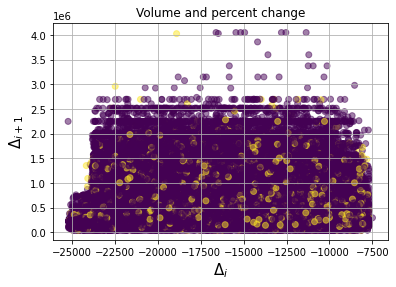

In [48]:

fig, ax = plt.subplots()
ax.scatter(x = df["DAYS_BIRTH"] , y = df['AMT_CREDIT'], c=df['TARGET'], alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')
ax.grid(True)
plt.show()

In [ ]:
sns.jointplot(data=df, x = 'YEARS_OLD' , y ='AMT_INCOME_TOTAL', kind ='scatter', hue = "TARGET");

Dropando colunas com mais de 50% valores nulos

In [9]:
def dropNullColumns (df):
    """drop columns with 50% values null"""
    
    for col in df.columns:
    
        if (df[col].isnull().sum()/df.shape[0]) > 0.75:
            df.drop(columns= col, inplace = True)
            
    return df

In [10]:
df.shape

(246008, 121)

In [11]:
dropNullColumns(df)
df.shape

(246008, 121)

Transformando todas as colunas em Series

In [12]:
all_cols = pd.Series(df.columns.tolist(), name='colunas')
all_cols

0                          TARGET
1              NAME_CONTRACT_TYPE
2                     CODE_GENDER
3                    FLAG_OWN_CAR
4                 FLAG_OWN_REALTY
                  ...            
116     AMT_REQ_CREDIT_BUREAU_DAY
117    AMT_REQ_CREDIT_BUREAU_WEEK
118     AMT_REQ_CREDIT_BUREAU_MON
119     AMT_REQ_CREDIT_BUREAU_QRT
120    AMT_REQ_CREDIT_BUREAU_YEAR
Name: colunas, Length: 121, dtype: object

Atualiza as Series, retirando colunas que foram excluídas pela função de valores nulos > 50%


In [13]:
def retiraColunas (all_cols, cols):

  return pd.merge(all_cols,  cols, how= 'inner', on= 'colunas')

In [14]:
cols_normalizadas.shape

(47,)

In [15]:
cols_num =  retiraColunas(all_cols, cols_num)
cols_normalizadas = retiraColunas(all_cols, cols_normalizadas)
cols_normalizadas.shape

(47, 1)

In [16]:
df[cols_categoricas.tolist()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246008 entries, 456162 to 454197
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          246008 non-null  object
 1   CODE_GENDER                 246008 non-null  object
 2   FLAG_OWN_CAR                246008 non-null  object
 3   FLAG_OWN_REALTY             246008 non-null  object
 4   NAME_TYPE_SUITE             244960 non-null  object
 5   NAME_INCOME_TYPE            246008 non-null  object
 6   NAME_EDUCATION_TYPE         246008 non-null  object
 7   NAME_FAMILY_STATUS          246008 non-null  object
 8   NAME_HOUSING_TYPE           246008 non-null  object
 9   OCCUPATION_TYPE             168771 non-null  object
 10  ORGANIZATION_TYPE           246008 non-null  object
 11  WEEKDAY_APPR_PROCESS_START  246008 non-null  object
 12  EMERGENCYSTATE_MODE         129247 non-null  object
 13  FONDKAPREMONT_MODE      

In [17]:
# df[['FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE']] 

In [18]:
def tranfomacaoRobusta (df, cols):
    
    '''realiza a transfomação caso a distribuição não seja normal'''

    mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean', copy= False)


    for col in cols:
    
        df[col] = mean_imputer.fit_transform(df[col])
    
        k2, p = normaltest(df[col])

        alpha = 0.055

        if p < alpha:

            power_transform(df[col], method='yeo-johnson', standardize=True, copy= False)

    return df

In [19]:
tranfomacaoRobusta(df, cols_num.values)
tranfomacaoRobusta(df, cols_normalizadas.values)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
456162,0,Cash loans,F,N,N,0.0,112500.0,700830.0,22738.5,585000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
134978,0,Cash loans,F,N,N,0.0,90000.0,375322.5,14422.5,324000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
318952,0,Cash loans,M,Y,N,0.0,180000.0,544491.0,16047.0,454500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
361264,0,Cash loans,F,N,Y,0.0,270000.0,814041.0,28971.0,679500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
260639,0,Cash loans,F,N,Y,0.0,144000.0,675000.0,21906.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242114,0,Cash loans,F,N,Y,1.0,270000.0,1172470.5,34411.5,918000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0
452374,0,Cash loans,F,N,Y,0.0,180000.0,654498.0,27859.5,585000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
276545,1,Revolving loans,M,N,N,1.0,112500.0,270000.0,13500.0,270000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# df[cols_normalizadas.tolist()].info(verbose=True, null_counts=True)

In [21]:
df[cols_num['colunas'].tolist()].isnull().sum()

CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_ANNUITY                0
AMT_GOODS_PRICE            0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
DAYS_REGISTRATION          0
DAYS_ID_PUBLISH            0
OWN_CAR_AGE                0
CNT_FAM_MEMBERS            0
HOUR_APPR_PROCESS_START    0
dtype: int64

In [50]:
df['YEARS_OLD'] = round(abs((df['DAYS_BIRTH']) / 365) // 5)
df['YEARS_OLD']

SK_ID_CURR
456162     4.0
134978     7.0
318952     7.0
361264    12.0
260639    10.0
          ... 
242114     8.0
452374    13.0
276545     8.0
236776     7.0
454197     8.0
Name: YEARS_OLD, Length: 246008, dtype: float64

In [23]:
all_cols = all_cols.tolist()
all_cols.append('YEARS_OLD') 
all_cols 

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BU

In [24]:

X = df #features
y = df['TARGET'] # target

X.drop(columns=["TARGET",'DAYS_BIRTH', "CODE_GENDER"], inplace = True);

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
sm = RandomOverSampler(random_state= 42)

print('Original dataset shape', Counter(y_train))

X_res, y_res = sm.fit_resample(X_train, y_train)

print('Dataset shape oversampling', Counter(y_res))

Original dataset shape Counter({0: 180830, 1: 15976})
Dataset shape oversampling Counter({0: 180830, 1: 180830})


In [26]:
'TARGET' in X_res.columns.tolist() 

False

In [27]:
cols_num.index[(cols_num['colunas'] =='DAYS_BIRTH')].tolist()

[5]

In [28]:
cols_num.drop(cols_num.index[(cols_num['colunas'] =='DAYS_BIRTH')].tolist(), inplace= True)
cols_num = cols_num['colunas'].tolist()
cols_num.append('YEARS_OLD') 
cols_num

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'YEARS_OLD']

In [29]:

#dados faltantes e normalização

# ==========================================================


#transformar as colunas numericas
pipe_features_num = Pipeline([('std', StandardScaler())]) # colocar os passos e os métodos do que iremos fazer com as features numéricas

features_num = cols_num.copy()

# ==========================================================

#transformar as colunas categoricas
pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("onehot", OneHotEncoder(handle_unknown="ignore"))])

features_cat = X_res.select_dtypes(exclude=np.number).columns.tolist()

# ==========================================================


#transformar as colunas numericas
pre_process = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

# ==========================================================

# Incluir o modelo no pipeline
pipe_xgb = Pipeline([('pre_process', pre_process), ('xgb', XGBClassifier(max_depth=3))])

# ==========================================================


In [30]:
pipe_xgb.fit(X_res, y_res)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_REGISTRATION',
                                                   'DAYS_ID_PUBLISH',
                                                   'OWN_CAR_AGE',
                                                   'CNT_FAM_MEMBERS',
                                                   'HOUR_APPR_PROCESS_START',
                              

In [31]:
def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):
    
    # ============================================

    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)
    y_probs_train = estimator.predict_proba(X_train)[:, 1]

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))
    
    disp = RocCurveDisplay.from_predictions(y_train, y_probs_train)
    disp.ax_.set_title(f"AUC: {roc_auc_score(y_train, y_probs_train):.3f}", fontsize=16)
    x = np.linspace(0, 1, 100)
    plt.plot(x, x, ls=":", color="black")
    plt.show()

    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)
    y_probs_test = estimator.predict_proba(X_test)[:, 1]

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))
    
    disp = RocCurveDisplay.from_predictions(y_test, y_probs_test)
    disp.ax_.set_title(f"AUC: {roc_auc_score(y_test, y_probs_test):.3f}", fontsize=16)
    x = np.linspace(0, 1, 100)
    plt.plot(x, x, ls=":", color="black")
    plt.show()


Métricas de avaliação de treino:


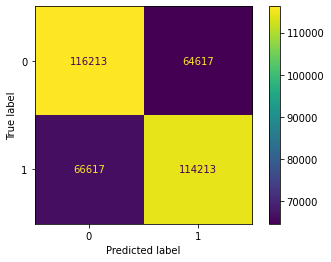

              precision    recall  f1-score   support

           0       0.64      0.64      0.64    180830
           1       0.64      0.63      0.64    180830

    accuracy                           0.64    361660
   macro avg       0.64      0.64      0.64    361660
weighted avg       0.64      0.64      0.64    361660



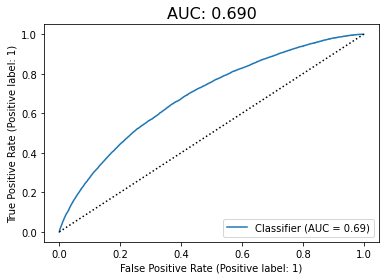


Métricas de avaliação de teste:


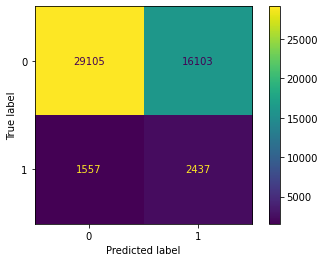

              precision    recall  f1-score   support

           0       0.95      0.64      0.77     45208
           1       0.13      0.61      0.22      3994

    accuracy                           0.64     49202
   macro avg       0.54      0.63      0.49     49202
weighted avg       0.88      0.64      0.72     49202



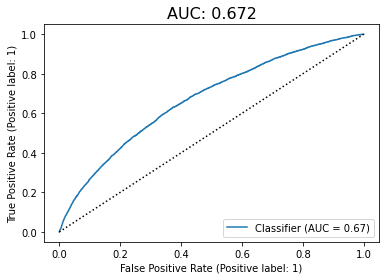

In [32]:
metricas_classificacao(pipe_xgb, X_res, X_test, y_res, y_test)

In [33]:
# params_grid = {"xgb__criterion": ["gini", "entropy"],
#                "xgb__n_estimators": (10, 100, 'uniform'), 
#                "xgb__max_depth" : (1, 6, 'uniform')
#                }
# splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


# # scoring =  

# # log-uniform: understand as search over p = exp(x) by varying x
# opt = BayesSearchCV(
#     pipe_xgb,
#     params_grid,
#     scoring='recall',
#     n_iter=50,
#     cv=splitter,
#     n_jobs=-1,
#     random_state=42,
#     verbose=2
# )

# opt.fit(X_res, y_res)

# print("val. score: %s" % opt.best_score_)
# print("test score: %s" % opt.score(X_test, y_test))
# print("best params: %s" % str(opt.best_params_))

In [34]:
# score_opt = metricas_classificacao(opt, X_res, X_test, y_res, y_test)